In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
from scipy.stats import boxcox

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from {}".format(postgres_db), con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [40]:
score_cols = ["math score", "reading score", "writing score"]
cat_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

<IPython.core.display.Javascript object>

In [39]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'exam_score'],
      dtype='object')

<IPython.core.display.Javascript object>

In [5]:
for score in score_cols:
    print(stats.describe(df[score]))

DescribeResult(nobs=1000, minmax=(0, 100), mean=66.089, variance=229.91899799799796, skewness=-0.278516571914075, kurtosis=0.26759715461497846)
DescribeResult(nobs=1000, minmax=(17, 100), mean=69.169, variance=213.16560460460462, skewness=-0.25871569927829347, kurtosis=-0.07391861478331307)
DescribeResult(nobs=1000, minmax=(10, 100), mean=68.054, variance=230.907991991992, skewness=-0.28900962452114176, kurtosis=-0.03919203131162252)


<IPython.core.display.Javascript object>

In [6]:
df["math score"].min()

0

<IPython.core.display.Javascript object>

In [7]:
df["math score"].replace(to_replace=0, value=np.nan)

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64

<IPython.core.display.Javascript object>

(array([  1.,   6.,  19.,  49., 127., 224., 226., 193., 104.,  50.]),
 array([  8. ,  17.2,  26.4,  35.6,  44.8,  54. ,  63.2,  72.4,  81.6,
         90.8, 100. ]),
 <a list of 10 Patch objects>)

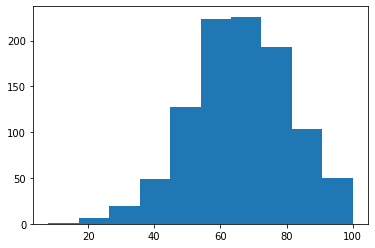

<IPython.core.display.Javascript object>

In [18]:
plt.hist(df["math score"].replace(to_replace=0, value=np.nan))

In [23]:
math_nas = df["math score"].replace(to_replace=0, value=np.nan).dropna()
math_boxcox, _ = boxcox(math_nas)
plt.hist(math_boxcox)

<IPython.core.display.Javascript object>

(array([  6.,  14.,  50., 122., 181., 160., 218., 136.,  73.,  40.]),
 array([ 34.46931217,  70.6479704 , 106.82662863, 143.00528686,
        179.18394509, 215.36260332, 251.54126154, 287.71991977,
        323.898578  , 360.07723623, 396.25589446]),
 <a list of 10 Patch objects>)

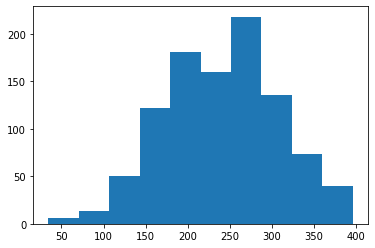

<IPython.core.display.Javascript object>

In [26]:
reading_nas = df["reading score"].replace(to_replace=0, value=np.nan).dropna()
reading_boxcox, _ = boxcox(reading_nas)
plt.hist(reading_boxcox)

(array([  5.,  12.,  53., 108., 171., 195., 202., 133.,  73.,  48.]),
 array([ 16.56448942,  55.99342115,  95.42235287, 134.8512846 ,
        174.28021633, 213.70914806, 253.13807978, 292.56701151,
        331.99594324, 371.42487497, 410.8538067 ]),
 <a list of 10 Patch objects>)

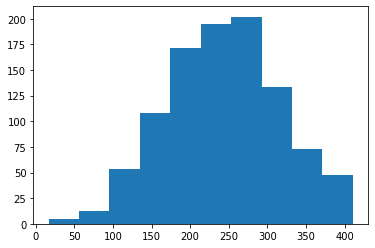

<IPython.core.display.Javascript object>

In [27]:
writing_nas = df["writing score"].replace(to_replace=0, value=np.nan).dropna()
writing_boxcox, _ = boxcox(writing_nas)
plt.hist(writing_boxcox)

In [11]:
boxcox?

<IPython.core.display.Javascript object>

In [32]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

<IPython.core.display.Javascript object>

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <a list of 10 Patch objects>)

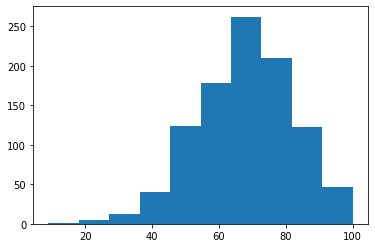

<IPython.core.display.Javascript object>

In [30]:
exam_score = (df["math score"] + df["reading score"] + df["writing score"]) / 3

plt.hist(exam_score)

In [33]:
jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


<IPython.core.display.Javascript object>

(array([  4.,  14.,  36., 123., 167., 222., 204., 128.,  73.,  29.]),
 array([ 14.97225502,  60.0201109 , 105.06796677, 150.11582265,
        195.16367852, 240.2115344 , 285.25939027, 330.30724615,
        375.35510202, 420.4029579 , 465.45081377]),
 <a list of 10 Patch objects>)

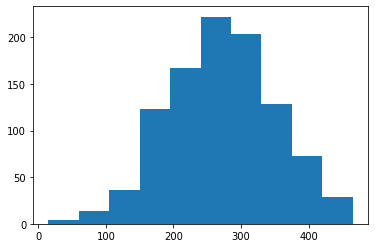

<IPython.core.display.Javascript object>

In [35]:
exam_score_boxcox, _ = boxcox(exam_score)
plt.hist(exam_score_boxcox)

In [36]:
jb_stats = jarque_bera(exam_score_boxcox)
norm_stats = normaltest(exam_score_boxcox)

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

Jarque-Bera test statistics is 2.4353989331279173 and p value is 0.29591013563984203
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


<IPython.core.display.Javascript object>

In [41]:
df["exam_score"] = exam_score
for cat in cat_cols:
    print(df.groupby(cat).mean())

        math score  reading score  writing score  exam_score
gender                                                      
female   63.633205      72.608108      72.467181   69.569498
male     68.728216      65.473029      63.311203   65.837483
                math score  reading score  writing score  exam_score
race/ethnicity                                                      
group A          61.629213      64.674157      62.674157   62.992509
group B          63.452632      67.352632      65.600000   65.468421
group C          64.463950      69.103448      67.827586   67.131661
group D          67.362595      70.030534      70.145038   69.179389
group E          73.821429      73.028571      71.407143   72.752381
                             math score  reading score  writing score  \
parental level of education                                             
associate's degree            67.882883      70.927928      69.896396   
bachelor's degree             69.389831      73.000000

<IPython.core.display.Javascript object>

In [ ]:
# level of education, lunch type, and test prep course seem to be the largest factors